<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Tablas_de_verdad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recreación de las puertas lógicas del paper:

[_Nonlinear delay differential equations and their application to modeling biological network motifs_](https://www.nature.com/articles/s41467-021-21700-8#Fig5)

In [377]:
import matplotlib.pyplot as plt
import numpy as np
import random 

In [378]:
def supr(e, n, s):
    return e/(1 + s**n)

In [468]:
def dS(S, i):
    R, Z = S
    # dR = (supr(e_1, n_1, X) + supr(e_2, n_1, Y) + supr(e_3, n_1, y4)) - R
    dR = supr(e_1, n_1, X[i]) + supr(e_2, n_2, Y[i]) - R
    dZ = supr(1, n_3, R) - Z
    # dZ = (e_1 + e_2)*supr(1, n_3, R) - Z
    # dZ = supr(e_1 + e_2, n_3, R) - Z

    return np.array([dR, dZ])

In [469]:
def RK_solver(S0, t):
    dims = len(S0)
    K = np.empty([4, dims])
    S = np.empty([len(t)+1, dims])
    
    for d in range(dims):   
        S[0, d] = S0[d]

    dt = t[1] - t[0]; 
    for i in range(len(t)):
        K[0] = dt * dS(S[i]         , i) 
        K[1] = dt * dS(S[i] + K[0]/2, i)
        K[2] = dt * dS(S[i] + K[1]/2, i)
        K[3] = dt * dS(S[i] + K[2]  , i)
        for d in range(dims):
            S[i+1, d] = S[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    S = S[0:-1,:]
    return S

In [470]:
start=0; step=0.1; num=800
t = np.arange(0,num)*step+start

S0 = np.array([0.1, 0.1])   

In [471]:
X = np.concatenate([np.zeros(num//2), np.ones(num//2)]) 
Y = np.concatenate([np.zeros(num//4), np.ones(num//4), np.zeros(num//4), np.ones(num//4)]) 

# Puerta lógica: ___OR___ 

In [478]:
n_1, n_2, n_3 = -4, -4, -20
e_1, e_2 = 2.4, 2.4

<ipython-input-378-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


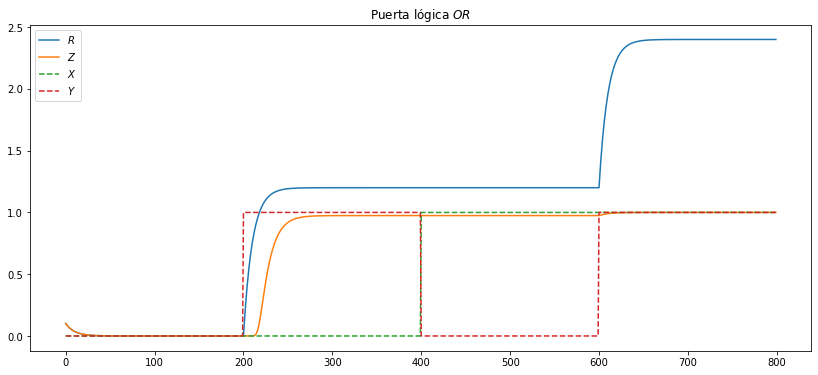

In [479]:
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
    # plt.plot(Pip[:,i]/(2*e_1), label=labels[i])
plt.plot(X, "--", label="$X$")
plt.plot(Y, "--", label="$Y$")
plt.title("Puerta lógica $OR$")
plt.legend(); plt.show()

# Puerta lógica: ___AND___

In [486]:
n_1, n_2, n_3 = -4, -4, -20
e_1, e_2 = 2.4, 2.4

<ipython-input-378-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


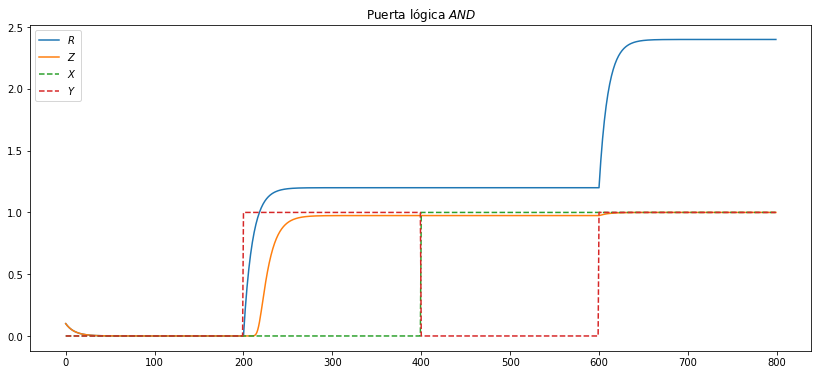

In [488]:
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X, "--", label="$X$")
plt.plot(Y, "--", label="$Y$")
plt.title("Puerta lógica $AND$")
plt.legend(); plt.show()

# Puerta lógica: ___X IMPLY Y___

In [490]:
n_1, n_2, n_3 = +2, -2, -20
e_1, e_2 = 1.5, 1.5

<ipython-input-378-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


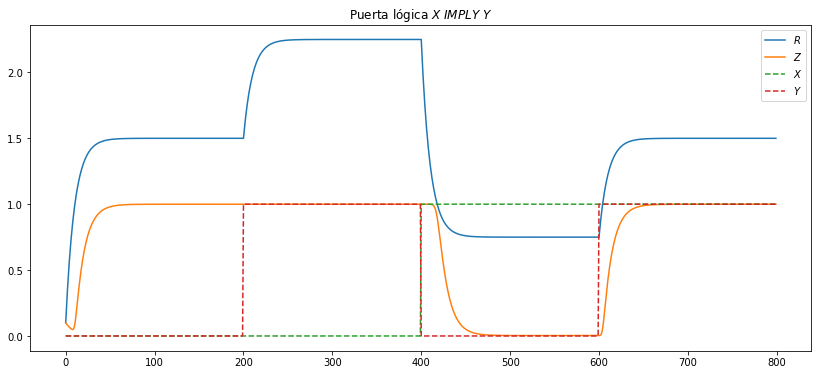

In [492]:
Pip = RK_solver(S0, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
    # plt.plot(Pip[:,i]/(2*e_1), label=labels[i])
plt.plot(X, "--", label="$X$")
plt.plot(Y, "--", label="$Y$")
plt.title("Puerta lógica $X$ $IMPLY$ $Y$")
plt.legend(); plt.show()

# Puerta lógica: ___X NIMPLY Y___

In [494]:
n_1, n_2, n_3 = -4, +4, -20

e_1, e_2 = 0.85, 0.85

<ipython-input-378-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


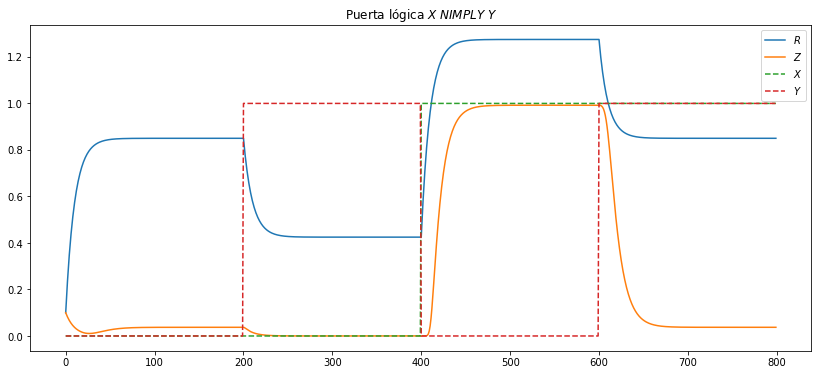

In [495]:
Pip = RK_solver(S0, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
    # plt.plot(Pip[:,i]/(2*e_1), label=labels[i])
plt.plot(X, "--", label="$X$")
plt.plot(Y, "--", label="$Y$")
plt.title("Puerta lógica $X$ $NIMPLY$ $Y$")
plt.legend(); plt.show()

# Puerta lógica de 3 entradas: ___OR___

Para esta parte se realiza la generalización de los casos más simples $n_1, n_2 <0$ es decir, las puertas lógicas $OR$ y $AND$.

In [496]:
X = np.concatenate([np.zeros(num//2), np.ones(num//2)]) 
Y = np.concatenate([np.zeros(num//4), np.ones(num//4), np.zeros(num//4), np.ones(num//4)]) 
ZZ = np.concatenate([np.zeros(num//8), np.ones(num//8), np.zeros(num//8), np.ones(num//8),
                     np.zeros(num//8), np.ones(num//8), np.zeros(num//8), np.ones(num//8)]) 

In [499]:
def dS(S, i):
    R, Z = S
    dR = e_1*(supr(1, n_1, X[i]) + supr(1, n_2, Y[i]) + supr(1, n_3, ZZ[i])) - R
    # dR = supr(e_1, n_1, X[i]) + supr(e_1, n_1, Y[i]) + supr(e_1, n_1, ZZ[i]) - R
    # dZ = supr(3 * e_1, n_4, R) - Z
    dZ = supr(1, n_4, R) - Z

    return np.array([dR, dZ])

In [500]:
n_1, n_2, n_3, n_4 = -4, -4, -4, -20
e_1 = 2.7

<ipython-input-378-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


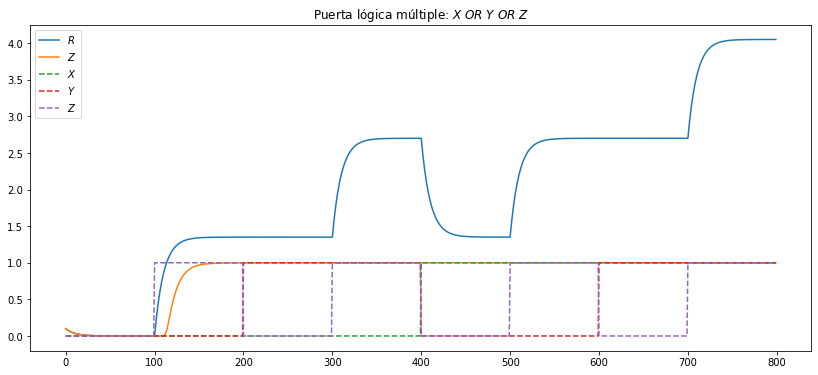

In [502]:
Pip = RK_solver(S0, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
    # plt.plot(Pip[:,i]/(3*e_1), label=labels[i])
plt.plot(X, "--", label="$X$")
plt.plot(Y, "--", label="$Y$")
plt.plot(ZZ, "--", label="$Z$")
plt.title("Puerta lógica múltiple: $X$ $OR$ $Y$ $OR$ $Z$")
plt.legend(); plt.show()

# Puerta lógica de 3 entradas: ___AND___

In [503]:
n_1, n_2, n_3, n_4 = -4, -4, -4, -20
e_1 = 0.85

<ipython-input-378-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


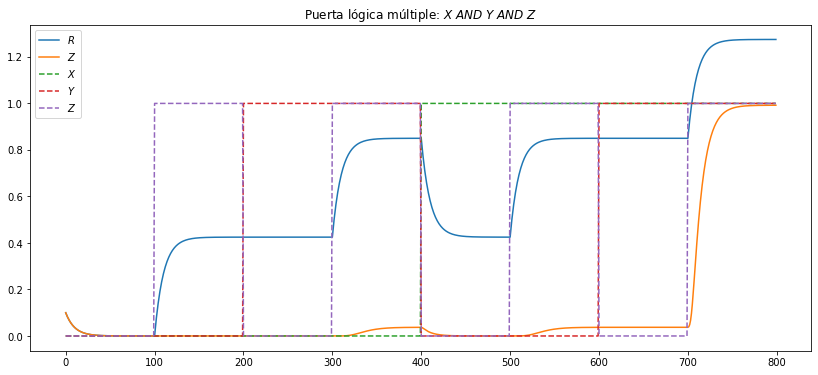

In [504]:
Pip = RK_solver(S0, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
    # plt.plot(Pip[:,i]/(3*e_1), label=labels[i])
plt.plot(X, "--", label="$X$")
plt.plot(Y, "--", label="$Y$")
plt.plot(ZZ, "--", label="$Z$")
plt.title("Puerta lógica múltiple: $X$ $AND$ $Y$ $AND$ $Z$")
plt.legend(); plt.show()

# Puerta lógica múltiple: ___X AND (NOT Y) AND (NOT Z)___

In [599]:
def dS(S, i):
    R, Z = S
    dR = e_1*(supr(1, n_1, 2*X[i]) + supr(1, n_2, 2*Y[i]) + supr(1, n_3, 2*ZZ[i])) - R
    # dR = supr(e_1, n_1, X[i]) + supr(e_1, n_1, Y[i]) + supr(e_1, n_1, ZZ[i]) - R
    # dZ = supr(3 * e_1, n_4, R) - Z
    dZ = supr(1, n_4, R) - Z

    return np.array([dR, dZ])

In [614]:
n_1, n_2, n_3, n_4 = -4, +4, +4, -20
e_1 = 0.43

<ipython-input-378-c9dcc9093113>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return e/(1 + s**n)


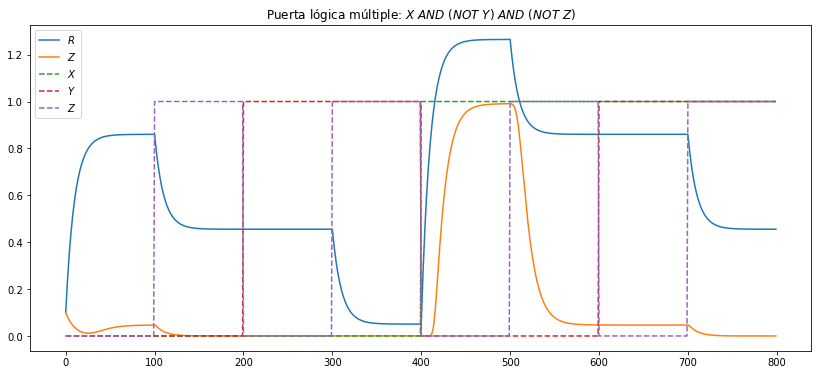

In [615]:
Pip = RK_solver(S0, t)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
    # plt.plot(Pip[:,i]/(3*e_1), label=labels[i])
plt.plot(X, "--", label="$X$")
plt.plot(Y, "--", label="$Y$")
plt.plot(ZZ, "--", label="$Z$")
plt.title("Puerta lógica múltiple: $X$ $AND$ $(NOT\ Y)$ $AND$ $(NOT\ Z)$")
plt.legend(); plt.show()